# Dimension reduction algorithm for the digits dataset

Load and return the digits dataset (classification).

Each datapoint is a 8x8 image of a digit.

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

Visualization

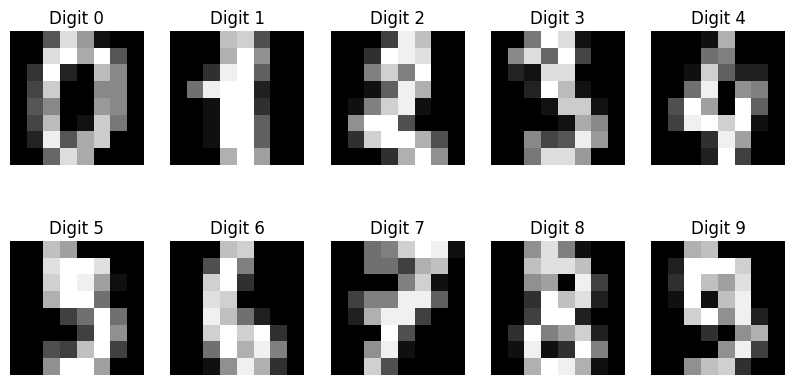

In [7]:
import matplotlib.pyplot as plt
# Afficher tous les digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Digit {i}')
    plt.axis('off')

In [23]:
digits.data.shape   #Data dimension

(1797, 64)

In [22]:
digits.data.shape[0]  #the number of samples in the dataset
#idem : len(digits.data)

1797

In [24]:
digits.data.shape[1]  #the dimension of the ambient space

64

In [11]:
digits.data #samples in the dataset

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
digits.target  ## the target values (labels)

array([0, 1, 2, ..., 8, 9, 8])

the digits dataset $\mathbf{X}$

In [27]:
X = digits.data
y = digits.target

In [28]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [29]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X=scaler.transform(X)
print(X)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


## 1. Dimensionality reduction using truncated SVD (aka LSA).

In [48]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=20) #n_components to set the target dimension
Y2=svd.fit_transform(X)

In [49]:
Y2

array([[ 1.91421367, -0.95450156, -3.9460348 , ..., -0.09015324,
         0.41484534,  0.43262615],
       [ 0.58898027,  0.92463586,  3.92475458, ..., -0.42046917,
         0.54730788,  0.00462866],
       [ 1.3020391 , -0.3171889 ,  3.02333334, ..., -0.46800927,
        -1.06295701, -1.19106251],
       ...,
       [ 1.02259602, -0.14791067,  2.46997366, ...,  0.66763347,
        -1.61055509,  0.20128174],
       [ 1.07605528, -0.38090633, -2.45548647, ...,  0.80803213,
        -1.76247923,  0.73443776],
       [-1.25770231, -2.22759111,  0.28362838, ...,  1.94471431,
        -2.43591556, -1.22214359]])

In [45]:
svd.singular_values_  #Print the 20 largest singular values of X

array([114.85302699, 102.37451345,  96.21078044,  84.39999879,
        72.99010869,  67.96610733,  65.73578076,  60.95356671,
        57.32852325,  56.6919044 ,  55.22074589,  53.14967218,
        49.94114138,  49.41001546,  48.71813553,  45.80626089,
        44.11536053,  42.37295286,  41.83205059,  40.40115782])

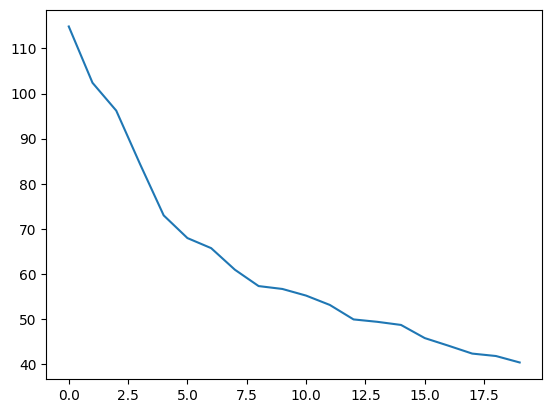

In [35]:
plt.plot(svd.singular_values_)

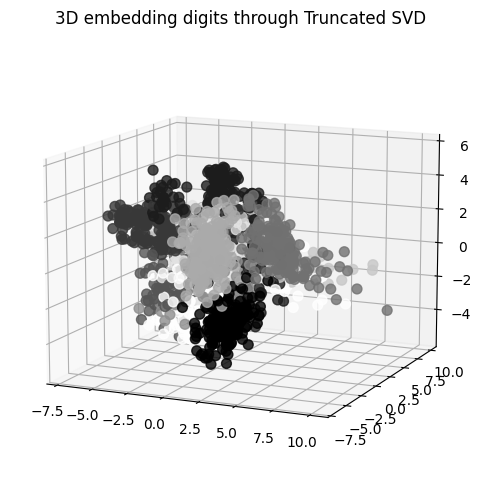

In [51]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    Y2[:, 0], Y2[:, 1], Y2[:, 2], c=y, s=50, alpha=0.8
)
ax.set_title("3D embedding digits through Truncated SVD")
ax.view_init(azim=-66, elev=12)